In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

In [ ]:

# Number of samples
n_samples = 500

In [ ]:
# Generate random data
ages = np.random.randint(3, 19, n_samples)  # Age between 3 and 18
genders = np.random.choice(['Male', 'Female'], n_samples)
iq_scores = np.random.randint(70, 141, n_samples)  # IQ between 70 and 140
social_skills = np.random.randint(1, 11, n_samples)  # Social Skills between 1 and 10
communication_skills = np.random.randint(1, 11, n_samples)  # Communication Skills between 1 and 10
repetitive_behaviors = np.random.randint(1, 11, n_samples)  # Repetitive Behaviors between 1 and 10
sensory_sensitivity = np.random.randint(1, 11, n_samples)  # Sensory Sensitivity between 1 and 10
eye_contact = np.random.randint(1, 11, n_samples)  # Eye Contact Frequency between 1 and 10
sleep_issues = np.random.choice([0, 1], n_samples)  # Sleep Issues (0 = No, 1 = Yes)
parental_involvement = np.random.choice([0, 1], n_samples)  # Parental Involvement (0 = No, 1 = Yes)
family_history = np.random.choice([0, 1], n_samples)  # Family History of ASD (0 = No, 1 = Yes)
motor_skills = np.random.randint(1, 11, n_samples)  # Motor Skills between 1 and 10

In [ ]:
# Generate diagnosis (1 for ASD, 0 for Non-ASD)
diagnosis = np.random.choice([0, 1], n_samples, p=[0.7, 0.3])  # 30% ASD, 70% Non-ASD

In [ ]:
# Adjust features for ASD individuals
social_skills[diagnosis == 1] = np.random.randint(1, 6, np.sum(diagnosis == 1))  # Lower social skills for ASD
communication_skills[diagnosis == 1] = np.random.randint(1, 6, np.sum(diagnosis == 1))  # Lower communication for ASD
repetitive_behaviors[diagnosis == 1] = np.random.randint(6, 11, np.sum(diagnosis == 1))  # Higher repetitive behaviors
sensory_sensitivity[diagnosis == 1] = np.random.randint(6, 11, np.sum(diagnosis == 1))  # Higher sensory sensitivity
eye_contact[diagnosis == 1] = np.random.randint(1, 6, np.sum(diagnosis == 1))  # Lower eye contact for ASD
sleep_issues[diagnosis == 1] = np.random.choice([1], np.sum(diagnosis == 1))  # More likely sleep issues for ASD
parental_involvement[diagnosis == 1] = np.random.choice([1], np.sum(diagnosis == 1))  # Higher parental involvement for ASD
motor_skills[diagnosis == 1] = np.random.randint(1, 6, np.sum(diagnosis == 1))  # Lower motor skills for ASD

In [ ]:
# Create DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'IQ': iq_scores,
    'Social Skills': social_skills,
    'Communication Skills': communication_skills,
    'Repetitive Behaviors': repetitive_behaviors,
    'Sensory Sensitivity': sensory_sensitivity,
    'Eye Contact': eye_contact,
    'Sleep Issues': sleep_issues,
    'Parental Involvement': parental_involvement,
    'Family History': family_history,
    'Motor Skills': motor_skills,
    'Diagnosis': diagnosis
})

In [ ]:
# Save to CSV
data.to_csv('enhanced_synthetic_autism_detection_data.csv', index=False)

In [ ]:
print("Enhanced dataset generated and saved as 'enhanced_synthetic_autism_detection_data.csv'")

Enhanced dataset generated and saved as 'enhanced_synthetic_autism_detection_data.csv'


PREDICTION PART

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load the dataset
data = pd.read_csv('/content/enhanced_synthetic_autism_detection_data.csv')


In [ ]:
# Label Encoding for 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [ ]:
# Split data into features (X) and target (y)
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features (important for models like KNN, SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Save the scaler for future use in prediction (Streamlit)
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
print("Preprocessing completed: Data split, scaled, and saved scaler.")

Preprocessing completed: Data split, scaled, and saved scaler.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}


In [ ]:
# Dictionary to store model evaluation results
results = {}

In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1-score": f1
    }

    # Print the classification report for each model
    print(f"Classification Report for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

Classification Report for Logistic Regression:
Accuracy: 0.9700, Precision: 0.9118, Recall: 1.0000, F1-score: 0.9538

Classification Report for SVM:
Accuracy: 0.9900, Precision: 0.9688, Recall: 1.0000, F1-score: 0.9841

Classification Report for KNN:
Accuracy: 0.9200, Precision: 0.7949, Recall: 1.0000, F1-score: 0.8857

Classification Report for Random Forest:
Accuracy: 0.9900, Precision: 0.9688, Recall: 1.0000, F1-score: 0.9841



In [ ]:
# Save the best model (Random Forest in this case)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [ ]:
print("Best model trained and saved.")

Best model trained and saved.


In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
# Convert results into a DataFrame for easy plotting
results_df = pd.DataFrame(results).T


In [ ]:
# Create a bar plot using Plotly for all models
fig = px.bar(results_df, x=results_df.index, y=results_df.columns,
             title="Model Comparison: Accuracy, Precision, Recall, F1-Score",
             labels={'value': 'Score', 'index': 'Model'})

In [ ]:
fig.show()

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pickle

In [ ]:
import numpy as np

In [ ]:
# Load the pre-trained model and scaler
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [ ]:
!pip install pyngrok

In [ ]:
# Streamlit app layout
st.title("Autism Detection Prediction")

2024-12-19 09:09:40.131 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09:40.408 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-19 09:09:40.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# Collecting user input through Streamlit's form
age = st.number_input("Age", min_value=3, max_value=18)
gender = st.selectbox("Gender", ["Male", "Female"])
iq = st.number_input("IQ Score", min_value=70, max_value=140)
social_skills = st.slider("Social Skills Rating (1-10)", min_value=1, max_value=10)
communication_skills = st.slider("Communication Skills Rating (1-10)", min_value=1, max_value=10)
repetitive_behaviors = st.slider("Repetitive Behaviors Rating (1-10)", min_value=1, max_value=10)
sensory_sensitivity = st.slider("Sensory Sensitivity (1-10)", min_value=1, max_value=10)
eye_contact = st.slider("Eye Contact Frequency (1-10)", min_value=1, max_value=10)
sleep_issues = st.selectbox("Sleep Issues (0 = No, 1 = Yes)", [0, 1])
parental_involvement = st.selectbox("Parental Involvement (0 = No, 1 = Yes)", [0, 1])
family_history = st.selectbox("Family History of ASD (0 = No, 1 = Yes)", [0, 1])
motor_skills = st.slider("Motor Skills Rating (1-10)", min_value=1, max_value=10)

2024-12-19 09:09:42.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09:42.652 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09:42.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09:42.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09:42.661 Session state does not function when running a script without `streamlit run`
2024-12-19 09:09:42.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09:42.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09:42.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:09

In [ ]:
# Prepare the input data for prediction
input_data = np.array([[age, gender, iq, social_skills, communication_skills,
                        repetitive_behaviors, sensory_sensitivity, eye_contact,
                        sleep_issues, parental_involvement, family_history, motor_skills]])

In [ ]:
# Label encode the gender input (Male = 0, Female = 1)
gender_encoded = 1 if gender == "Female" else 0
input_data[0][1] = gender_encoded  # Replace the gender value with the encoded value



In [ ]:
# Convert the input data into a DataFrame with column names
column_names = ['Age', 'Gender', 'IQ', 'Social Skills', 'Communication Skills',
                'Repetitive Behaviors', 'Sensory Sensitivity', 'Eye Contact',
                'Sleep Issues', 'Parental Involvement', 'Family History', 'Motor Skills']

In [ ]:
input_data_df = pd.DataFrame(input_data, columns=column_names)

In [ ]:
# Scale the input data
input_data_scaled = scaler.transform(input_data_df)



In [ ]:
# Make the prediction
prediction = model.predict(input_data_scaled)


In [ ]:
# Display the prediction result
if prediction[0] == 1:
    st.write("The model predicts: **Autism Spectrum Disorder (ASD)**")
else:
    st.write("The model predicts: **No Autism Spectrum Disorder (Non-ASD)**")

2024-12-19 09:10:05.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:10:05.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:10:05.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 09:10:05.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


app.py

In [ ]:
# Streamlit code to create 'app.py' file

code = """
import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load the pre-trained model and scaler
with open('models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Streamlit app layout
st.title("Autism Detection Prediction")

# Collecting user input through Streamlit's form
age = st.number_input("Age", min_value=3, max_value=18)
gender = st.selectbox("Gender", ["Male", "Female"])
iq = st.number_input("IQ Score", min_value=70, max_value=140)
social_skills = st.slider("Social Skills Rating (1-10)", min_value=1, max_value=10)
communication_skills = st.slider("Communication Skills Rating (1-10)", min_value=1, max_value=10)
repetitive_behaviors = st.slider("Repetitive Behaviors Rating (1-10)", min_value=1, max_value=10)
sensory_sensitivity = st.slider("Sensory Sensitivity (1-10)", min_value=1, max_value=10)
eye_contact = st.slider("Eye Contact Frequency (1-10)", min_value=1, max_value=10)
sleep_issues = st.selectbox("Sleep Issues (0 = No, 1 = Yes)", [0, 1])
parental_involvement = st.selectbox("Parental Involvement (0 = No, 1 = Yes)", [0, 1])
family_history = st.selectbox("Family History of ASD (0 = No, 1 = Yes)", [0, 1])
motor_skills = st.slider("Motor Skills Rating (1-10)", min_value=1, max_value=10)

# Prepare the input data for prediction
input_data = np.array([[age, gender, iq, social_skills, communication_skills,
                       repetitive_behaviors, sensory_sensitivity, eye_contact,
                       sleep_issues, parental_involvement, family_history, motor_skills]])

# Label encode the gender input (Male = 0, Female = 1)
gender_encoded = 1 if gender == "Female" else 0
input_data[0][1] = gender_encoded  # Replace the gender value with the encoded value

# Convert the input data into a DataFrame with column names
column_names = ['Age', 'Gender', 'IQ', 'Social Skills', 'Communication Skills',
               'Repetitive Behaviors', 'Sensory Sensitivity', 'Eye Contact',
               'Sleep Issues', 'Parental Involvement', 'Family History', 'Motor Skills']

input_data_df = pd.DataFrame(input_data, columns=column_names)

# Scale the input data
input_data_scaled = scaler.transform(input_data_df)

# Make the prediction
prediction = model.predict(input_data_scaled)

# Display the prediction result
if prediction[0] == 1:
    st.write("The model predicts: **Autism Spectrum Disorder (ASD)**")
else:
    st.write("The model predicts: **No Autism Spectrum Disorder (Non-ASD)**")
"""

# Save the code as 'app.py'
with open('/content/app.py', 'w') as f:
    f.write(code)

# Download the 'app.py' file to your local machine
from google.colab import files
files.download('/content/app.py')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data for the metrics of each model
data = {
    "Model": ["Logistic Regression", "SVM", "KNN", "Random Forest"],
    "Accuracy": [0.9700, 0.9900, 0.9200, 0.9900],
    "Precision": [0.9118, 0.9688, 0.7949, 0.9688],
    "Recall": [1.0000, 1.0000, 1.0000, 1.0000],
    "F1-Score": [0.9538, 0.9841, 0.8857, 0.9841]
}


In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)

In [ ]:
# Plot the metrics
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

<Figure size 1200x800 with 0 Axes>

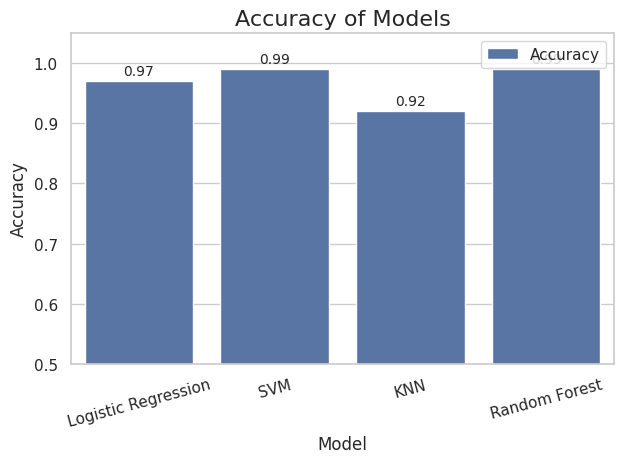

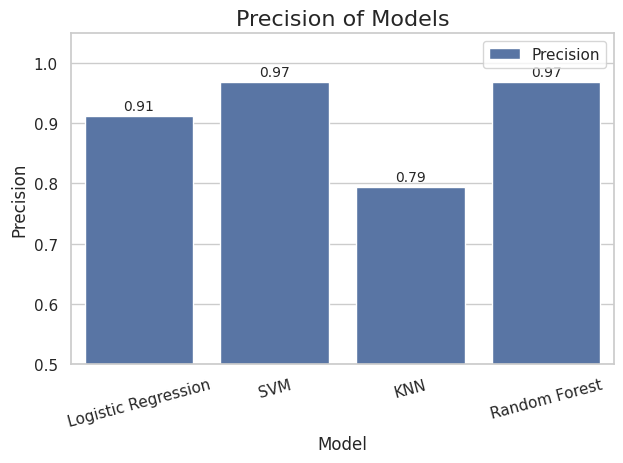

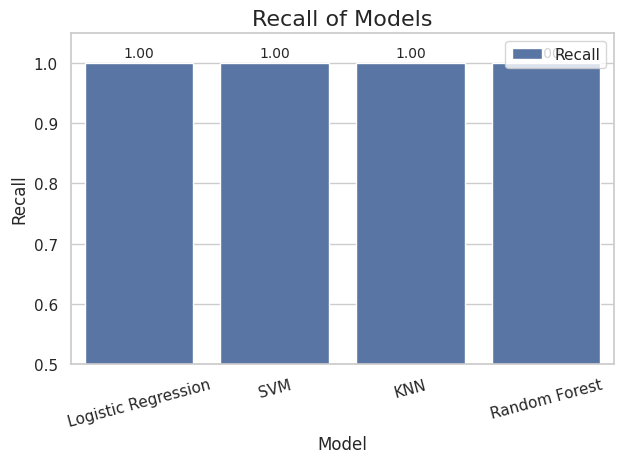

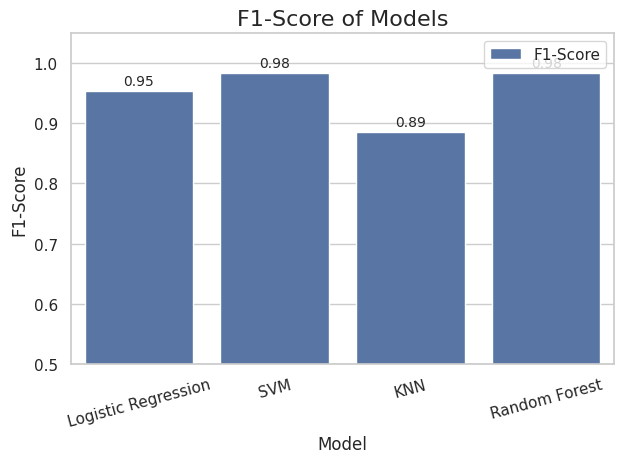

In [ ]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for metric in metrics:
    sns.barplot(x="Model", y=metric, data=df, label=metric)

    plt.title(f"{metric} of Models", fontsize=16)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.xticks(rotation=15)
    plt.ylim(0.5, 1.05)

    # Displaying the values on the bars
    for i, value in enumerate(df[metric]):
        plt.text(i, value + 0.01, f"{value:.2f}", ha="center", fontsize=10)

    plt.tight_layout()
    plt.show()

In [ ]:
# Data for the metrics of each model
data = {
    "Metrics": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression": [0.9700, 0.9118, 1.0000, 0.9538],
    "SVM": [0.9900, 0.9688, 1.0000, 0.9841],
    "KNN": [0.9200, 0.7949, 1.0000, 0.8857],
    "Random Forest": [0.9900, 0.9688, 1.0000, 0.9841]
}


In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)


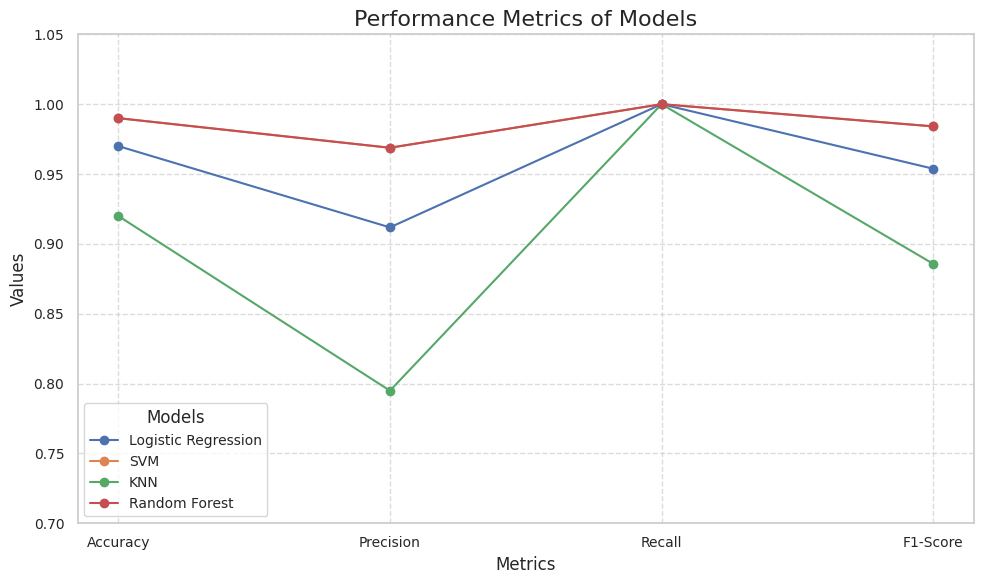

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot line graph for each model
for model in df.columns[1:]:
    plt.plot(df["Metrics"], df[model], marker='o', label=model)

# Customize the plot
plt.title("Performance Metrics of Models", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.ylim(0.7, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Models", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()